In [1]:
import pandas as pd
import pickle
import os

from Model.ModelEvaluation import models_evaluator

all_datasets = ["adult", "bank", "cars", "credit", "diabetes", "housing"]
all_methods = ["tablegan", "medgan", "ctgan", "cWGAN", "ctab-gan", "CasTGAN"]

pred_tasks = {"adult": "binary_classification", 
                "bank": "binary_classification",
                "cars": "regression",
                "credit": "binary_classification",
                "diabetes": "binary_classification",
                "housing": "regression"}

selected_dataset = all_datasets[1]
selected_methods = all_methods[5]

In [2]:
dataset_name = all_datasets[0]

In [3]:
dtype_pkl_file = "Data/" + dataset_name + "_dtypes.pkl"

with open(dtype_pkl_file, 'rb') as pklr:
    dataset_dtypes = pickle.load(pklr)

train_name = "Data/" + dataset_name + "_train.csv"
test_name = "Test_Data/" + dataset_name + "_test.csv"

train_data = pd.read_csv(train_name,  header = 0, dtype = dataset_dtypes)
test_data = pd.read_csv(test_name,  header = 0, dtype = dataset_dtypes)

catg_cols = [k for k,v in dataset_dtypes.items() if v == "str"]

In [6]:
fake_dict = {}

for method in all_methods:
    fake_file_name = "Generated_Data/" + "wb_0/" + dataset_name + "_fake.csv"
    
    if os.path.isfile(fake_file_name):
        fake_df = pd.read_csv(fake_file_name,  header = 0, dtype = dataset_dtypes)
        fake_dict[method] = fake_df

eval_tstr
         Accuracy  ROCAUC  F1-score  PR-AUC
train      0.9085  0.9342    0.4978  0.6085
CasTGAN    0.8796  0.8255    0.5000  0.4801



FileNotFoundError: [Errno 2] No such file or directory: 'Someplots/bank_cat_dist.pdf'

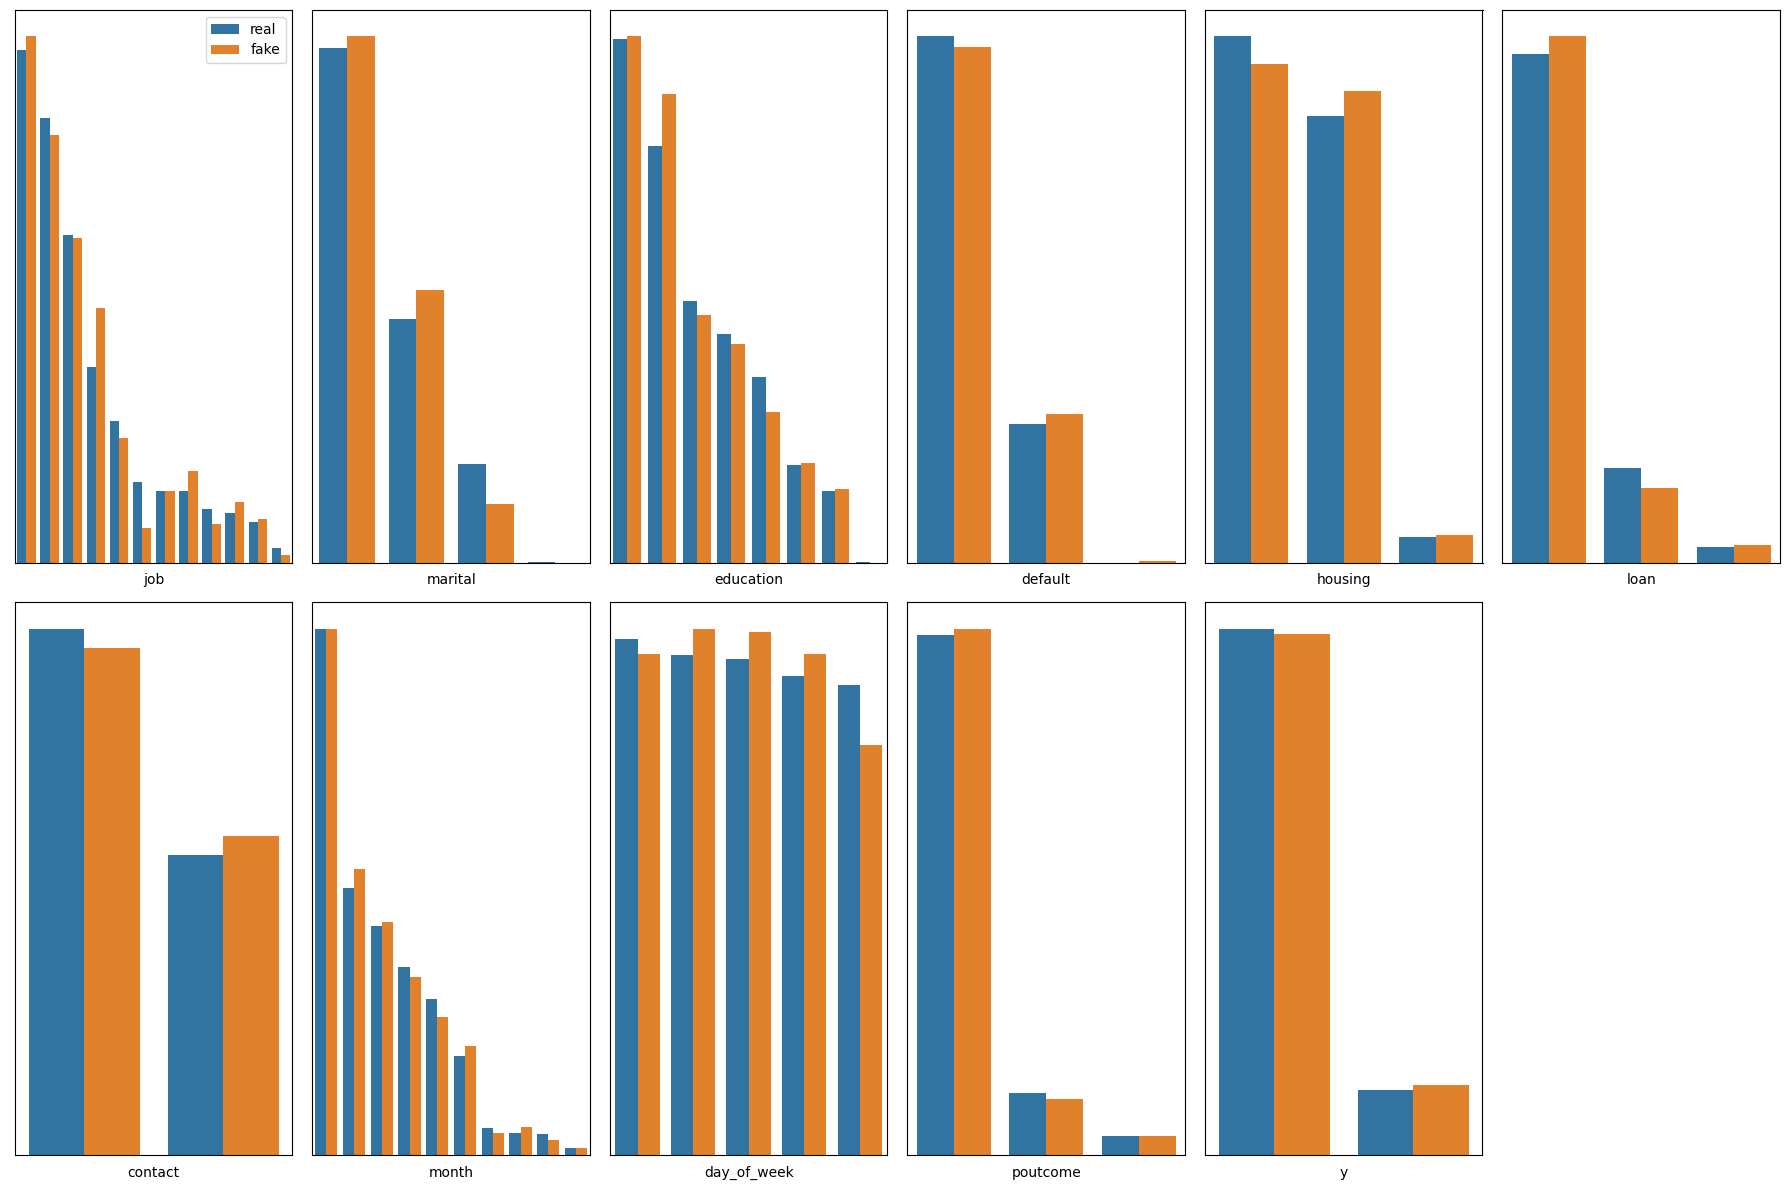

In [7]:
mod_eval = models_evaluator(train_set = train_data, test_set = test_data, dataset_name = dataset_name, categorical_cols = catg_cols, 
                           response_var = train_data.columns[-1], pred_task = pred_tasks[dataset_name], syn_output = fake_dict, random_seed = 88000)
eval_tstr, univariate, corr_prws = mod_eval.compute_metrics()